Group - 9

Danielle do Val Goncalves Tudeia - W0823569

Fernanda Barbieri de Camargo - W0825882

Jonathan Calle - W0825959

Jonathan Chukwuma Oteh - W0775057

Luis Patricio Ramirez Fernandez - W0811391

# Lab 2 - Part 2: **Image preprocessing and using a fully connected neural network for image classification.** Cont..

**Prerequisite**

- **Task 1**: Get set up with Google Colab
- **Task 2**: Get the neural network you created in **Lab 1: Exercise 7** running without error in Google Colab
- **Task 3:** Preprocess images for use in Task 4
---

In this lab, we will continue where we left off in *Part 1*. We will add a couple tasks to what you have already done:

- **Task 5**: Modify the network of **Task 2** so that it can work with the data from **Task 3** (10 Marks)
- **Task 6**: Modify the network of **Task 5** to improve the accuracy
(10 Marks)
- **Task 7**: Questions (10 Marks)



## Add all the code used for Task 3:  Preprocess images below

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [ ]:
p = Path().cwd()
q =  p / '/content/drive/MyDrive/Colab Notebooks/Lego_small'
print(q)

target_dict = {'brick 1x2': 0,
               'brick 2x2': 1,
               'brick 2x4': 2,
               'plate 1x2': 3,
               'plate 2x2': 4,
               'plate 2x4': 5,} # create dictionary mapping Lego block type to integer label
images = []
labels = []

for fldr in q.iterdir():
    current_label = fldr.name # get the name of the current label
    for img in fldr.iterdir():
        img = load_img(img, color_mode="grayscale") # load a grayscale image
        img_array = img_to_array (img) # convert the image to an NumPy array
        img_array_resized = smart_resize(img_array, (128, 128)) # resize the image to 128 by 128
        img_array_reshaped = img_array_resized.reshape((128,128)) # reshape the image from (128, 128, 1) to (128, 128)
        images.append(img_array_reshaped) # add reshaped image to list of images
        labels.append(current_label) # add label for this image to the list of labels

# Convert the list of images / labels to a NumPy array
images = np.array(images)
labels = np.array(labels)

/content/drive/MyDrive/Colab Notebooks/Lego_small


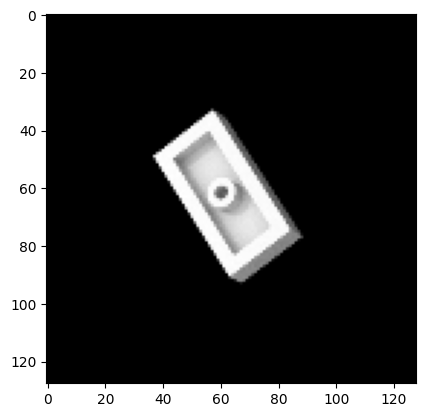

In [ ]:
plt.imshow(images[10], cmap='gray') # check if the image is on greyscale

In [ ]:
labels_int = np.array([target_dict[label] for label in labels])

In [ ]:
images_scaled = images.reshape(4800, 128 * 128) / 255
images_scaled.shape

(4800, 16384)

## Task 5

The next step is to modify the network of Task 2 so that it will work with the data that was processed in Task 3.

Here, you will need to:
 - use `sklearn` to create training, validation, and test sets in approximately the following ratio: 70%/20%/10%
 - train your network for 10 epochs while monitoring the accuracy on the validation (to do this, you will need to modify the `.fit()` method)
 - compute the overall accuracy on the test data
 - compute the confusion matrix (use `tf.math.confusion_matrix()`)
 - from the confusion matrix, compute the accuracy for each Lego block type (see image below)

<img src="images/cm-calculation.jpg" width=600 align="center">

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
all_train_images, test_images, all_train_labels, test_labels = train_test_split(images_scaled, labels_int, test_size=0.1, stratify=labels)
train_images, val_images, train_labels, val_labels = train_test_split(all_train_images, all_train_labels, test_size=0.22, stratify=all_train_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

network = Sequential()
network.add(Dense(128, activation = 'relu', input_shape = (128 * 128,)))
network.add(Dense(6, activation = 'softmax'))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2097280   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 2098054 (8.00 MB)
Trainable params: 2098054 (8.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = network.fit(train_images,
                      train_labels,
                      validation_data=(val_images, val_labels),
                      epochs=10,
                      batch_size=32)

Epoch 1/10
106/106 [==============================] - 5s 36ms/step - loss: 1.1132 - accuracy: 0.6346 - val_loss: 1.2293 - val_accuracy: 0.5542
Epoch 2/10
106/106 [==============================] - 3s 30ms/step - loss: 0.6994 - accuracy: 0.7480 - val_loss: 0.6570 - val_accuracy: 0.7907
Epoch 3/10
106/106 [==============================] - 2s 24ms/step - loss: 0.5789 - accuracy: 0.7993 - val_loss: 0.6792 - val_accuracy: 0.7634
Epoch 4/10
106/106 [==============================] - 2s 23ms/step - loss: 0.4859 - accuracy: 0.8308 - val_loss: 0.6049 - val_accuracy: 0.8118
Epoch 5/10
106/106 [==============================] - 2s 23ms/step - loss: 0.4377 - accuracy: 0.8486 - val_loss: 0.5324 - val_accuracy: 0.8139
Epoch 6/10
106/106 [==============================] - 3s 26ms/step - loss: 0.3846 - accuracy: 0.8691 - val_loss: 0.6235 - val_accuracy: 0.7939
Epoch 7/10
106/106 [==============================] - 4s 34ms/step - loss: 0.3393 - accuracy: 0.8884 - val_loss: 0.6243 - val_accuracy: 0.7497

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

15/15 [==============================] - 0s 14ms/step - loss: 0.7536 - accuracy: 0.7542


In [ ]:
predictions = np.argmax(network.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)

cm = tf.math.confusion_matrix(true_labels, predictions)
cm

15/15 [==============================] - 0s 18ms/step


<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[78,  0,  0,  2,  0,  0],
       [ 8, 72,  0,  0,  0,  0],
       [ 0,  3, 77,  0,  0,  0],
       [19,  0,  0, 61,  0,  0],
       [18,  8,  0,  8, 46,  0],
       [ 2,  1, 48,  0,  1, 28]], dtype=int32)>

In [ ]:
sum = 0
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    if i == j:
      sum += cm[i, j]

sum.numpy() / np.sum(cm)

0.7541666666666667

In [ ]:
def label_acc(cm, col):
  return cm[col, col] / np.sum(cm[:, col])

In [ ]:
# Label 0 - Accuracy
label_acc(cm, 0).numpy()

0.624

In [ ]:
# Label 1 - Accuracy
label_acc(cm, 1).numpy()

0.8571428571428571

In [ ]:
# Label 2 - Accuracy
label_acc(cm, 2).numpy()

0.616

In [ ]:
# Label 3 - Accuracy
label_acc(cm, 3).numpy()

0.8591549295774648

In [ ]:
# Label 4 - Accuracy
label_acc(cm, 4).numpy()

0.9787234042553191

In [ ]:
# Label 5 - Accuracy
label_acc(cm, 5).numpy()

1.0

## Task 6

The final step is to modify the network of **Task 5** to improve the accuracy as much as possible. When finished:
 - train your network for as many epochs as necessary for the accuracy to stop improving
 - compute the new overall accuracy on the test data and **compare** with that of **Task 5**
 - compute the new confusion matrix (use `tf.math.confusion_matrix()`) and **compare** with that of **Task 5**
 - using the confusion matrix, compute the new accuracy for each Lego block type and **compare** with that of **Task 5**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)

history = network.fit(train_images,
                      train_labels,
                      validation_data=(val_images, val_labels),
                      epochs=100,
                      batch_size=32,
                      callbacks=[early_stopping])

Epoch 1/100
106/106 [==============================] - 3s 27ms/step - loss: 0.0266 - accuracy: 0.9908 - val_loss: 0.7558 - val_accuracy: 0.8654
Epoch 2/100
106/106 [==============================] - 3s 26ms/step - loss: 0.0382 - accuracy: 0.9866 - val_loss: 0.7384 - val_accuracy: 0.8686
Epoch 3/100
106/106 [==============================] - 3s 29ms/step - loss: 0.0216 - accuracy: 0.9938 - val_loss: 0.6626 - val_accuracy: 0.8749
Epoch 4/100
106/106 [==============================] - 3s 29ms/step - loss: 0.0250 - accuracy: 0.9950 - val_loss: 0.7086 - val_accuracy: 0.8454
Epoch 5/100
106/106 [==============================] - 3s 24ms/step - loss: 0.0227 - accuracy: 0.9944 - val_loss: 1.1593 - val_accuracy: 0.8202
Epoch 6/100
106/106 [==============================] - 2s 22ms/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.6962 - val_accuracy: 0.8717
Epoch 7/100
106/106 [==============================] - 2s 22ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.6254 - val_accuracy:

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

15/15 [==============================] - 0s 7ms/step - loss: 0.5754 - accuracy: 0.8792


In [ ]:
predictions = np.argmax(network.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)

cm = tf.math.confusion_matrix(true_labels, predictions)
cm

15/15 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[66,  3,  0,  4,  6,  1],
       [ 3, 75,  0,  0,  2,  0],
       [ 0,  4, 69,  0,  0,  7],
       [ 2,  0,  0, 77,  1,  0],
       [ 6,  2,  0, 10, 61,  1],
       [ 0,  0,  8,  1,  3, 68]], dtype=int32)>

In [ ]:
sum = 0
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    if i == j:
      sum += cm[i, j]

sum.numpy() / np.sum(cm)

0.8666666666666667

In [ ]:
# Label 0 - Accuracy
label_acc(cm, 0).numpy()

0.8571428571428571

In [ ]:
# Label 1 - Accuracy
label_acc(cm, 1).numpy()

0.8928571428571429

In [ ]:
# Label 2 - Accuracy
label_acc(cm, 2).numpy()

0.8961038961038961

In [ ]:
# Label 3 - Accuracy
label_acc(cm, 3).numpy()

0.8369565217391305

In [ ]:
# Label 4 - Accuracy
label_acc(cm, 4).numpy()

0.8356164383561644

In [ ]:
# Label 5 - Accuracy
label_acc(cm, 5).numpy()

0.8831168831168831

## Task 7  
**Answer below questions:**

1. Compare the model's performance from Task 5 and 6.

Task 5: 0s 14ms/step - loss: 0.7536 - accuracy: 0.7542

Task 6: 0s 7ms/step - loss: 0.5754 - accuracy: 0.8792

The time taken reduced by half. The loss reduced 0.1782 and the accuracy improved 0.125. The new model is faster, with less loss and more accurate.


2. Why do both training and validation accuracies stop improving after some epochs?

Because when we defined the "early stopping", we defined that after 6 epochs without any improvement, the training ends. The ideia is prevent overfitting by stopping the training process.


3. Comment on the your model's regularization.

We used early_stopping callback. We defined that the metric to be monitored would be "val_accuracy", and after 6 epochs without any improvement achieved, the model would stop, avoiding overfitting in the training data saving computational resources and training time.

4. How your model behaves with respect to train data?

The training loss is decreasing: the model is learning to fit the training data better.

The training accuracy is high: the model is performing well on the training data.

Summarizing, we must analyze the validation's performance to understand if the model is overfitting and performing bad.

5. Suggest some methods that can improve your model in Task 6.

Change the batch size / reducing the "patience" could reduce the possibility of overfitting.
The callback early_stopping has more parameters to be defined (monitor, min_delta, mode, baseline, etc) that can improve our model.
